In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("../../labelled_data/part_B/imputed_partb.csv")

In [3]:
df = df.drop(["Unnamed: 0","Rndrng_NPI"],axis=1)

In [4]:
df

,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,...,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre,Fraud,FraudType
0,7310,0.0,39,1,16.0,291.0,764.0,402812.00,85319.63,69175.78,...,73.0,75.0,66.0,11.0,51.0,9.0,19.0,2.5028,0,0
1,7310,0.0,65,1,18.0,2633.0,5930.0,915291.00,227372.53,176497.74,...,48.0,48.0,24.0,10.0,38.0,1.0,3.0,1.1124,0,0
2,7310,0.0,5,1,54.0,167.0,2003.0,182532.48,101757.15,76938.82,...,52.0,68.0,31.0,6.0,75.0,10.0,5.0,1.6935,0,0
3,7310,1.0,56,1,21.0,56.0,571.0,23680.00,9011.99,7224.35,...,52.0,50.0,23.0,20.0,32.0,0.0,0.0,0.7089,0,0
4,9043,0.0,27,1,30.0,89.0,125.0,152154.00,30631.10,23962.85,...,43.0,60.0,33.0,13.0,57.0,7.0,8.0,2.1137,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100721,7310,0.0,22,1,9.0,155.0,171.0,329504.00,32266.94,25803.90,...,71.0,75.0,70.0,9.0,48.0,27.0,15.0,3.4526,0,0
1100722,7310,1.0,39,1,40.0,333.0,1093.0,182515.00,93505.14,68252.03,...,49.0,66.0,25.0,9.0,41.0,3.0,4.0,1.2418,0,0
1100723,3073,0.0,13,1,2.0,66.0,415.0,20985.00,16171.02,11759.42,...,61.0,53.0,26.0,17.0,56.0,0.0,0.0,0.9525,0,0
1100724,7310,0.0,63,1,46.0,456.0,851.0,304460.56,113283.09,85463.83,...,44.0,53.0,26.0,9.0,37.0,3.0,2.0,1.1737,0,0


(880580, 59)
(880580, 1, 59)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 59)                28084     
                                                                 
 dense (Dense)               (None, 128)               7680      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35893 (140.21 KB)
Trainable params: 35893 (140.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
5504/5504 [==============================] - 77s 14ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0015 - val_accuracy: 0.9999
Epoch 2/10
5504/5504 [==============================] - 79s 14ms/step - loss: 0.0011 - accuracy: 0.9999 - v

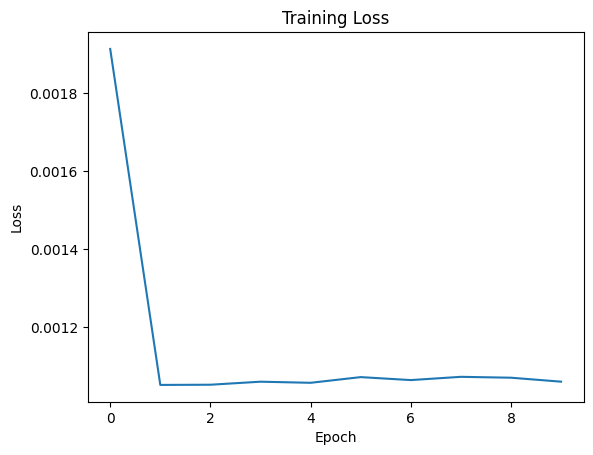

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud', 'FraudType'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 59
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=59, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [7]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
print(y_pred)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


6880/6880 [==============================] - 21s 3ms/step
[[0.00040766]
 [0.00040766]
 [0.00040766]
 ...
 [0.00040766]
 [0.00040766]
 [0.00040766]]
Accuracy: 0.9999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    220126
           1       0.00      0.00      0.00        20

    accuracy                           1.00    220146
   macro avg       0.50      0.50      0.50    220146
weighted avg       1.00      1.00      1.00    220146

Confusion Matrix:
 [[220126      0]
 [    20      0]]


/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [8]:
df = pd.read_csv("../../labelled_data/part_B/partb_rus_features.csv")

In [10]:
df = df.drop(["Unnamed: 0"],axis=1)

(185, 59)
(185, 1, 59)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 59)                28084     
                                                                 
 dense_2 (Dense)             (None, 128)               7680      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35893 (140.21 KB)
Trainable params: 35893 (140.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 2s 758ms/step - loss: 0.6808 - accuracy: 0.5608 - val_loss: 0.6889 - val_accuracy: 0.5676
Epoch 2/10
2/2 [==============================] - 0s 39ms/step - loss: 0.6693 - accuracy: 0.5608 - val_loss: 0.6928 -

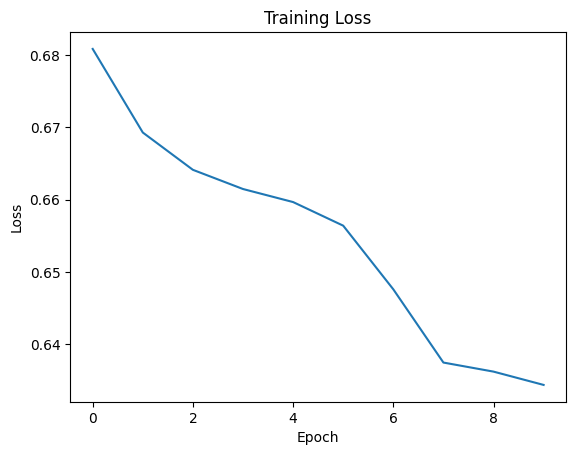

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 59
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=59, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [14]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


2/2 [==============================] - 0s 6ms/step
Accuracy: 0.4681
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.40      0.39        20
           1       0.54      0.52      0.53        27

    accuracy                           0.47        47
   macro avg       0.46      0.46      0.46        47
weighted avg       0.47      0.47      0.47        47

Confusion Matrix:
 [[ 8 12]
 [13 14]]


In [15]:
df = pd.read_csv("../../labelled_data/part_B/partb_ros_features.csv")

In [17]:
df = df.drop(["Unnamed: 0"],axis=1)

(1760976, 59)
(1760976, 1, 59)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 59)                28084     
                                                                 
 dense_4 (Dense)             (None, 128)               7680      
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35893 (140.21 KB)
Trainable params: 35893 (140.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
11007/11007 [==============================] - 145s 13ms/step - loss: 0.6714 - accuracy: 0.5693 - val_loss: 0.6816 - val_accuracy: 0.5442
Epoch 2/10
11007/11007 [==============================] - 160s 15ms/step - loss: 0.6704 - accuracy: 

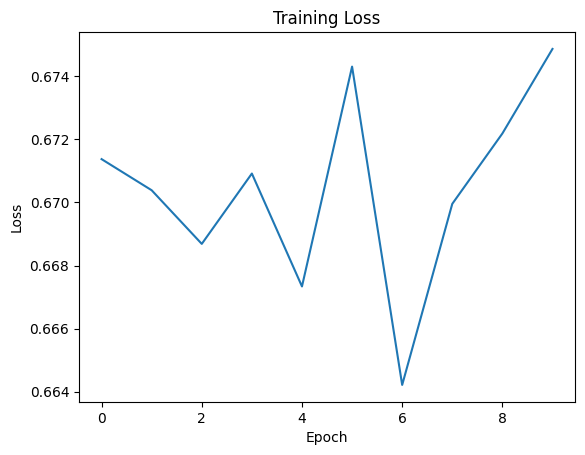

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 59
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=59, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [19]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


13758/13758 [==============================] - 44s 3ms/step
Accuracy: 0.5137
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.05      0.10    220260
           1       0.51      0.97      0.67    219984

    accuracy                           0.51    440244
   macro avg       0.59      0.51      0.38    440244
weighted avg       0.59      0.51      0.38    440244

Confusion Matrix:
 [[ 11800 208460]
 [  5640 214344]]


In [20]:
df = pd.read_csv("../../labelled_data/part_B/partb_smote_features.csv")

In [21]:
df = df.drop(["Unnamed: 0"],axis=1)

(1753212, 59)
(1753212, 1, 59)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 59)                28084     
                                                                 
 dense_6 (Dense)             (None, 128)               7680      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35893 (140.21 KB)
Trainable params: 35893 (140.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
10958/10958 [==============================] - 148s 13ms/step - loss: 0.6600 - accuracy: 0.6013 - val_loss: 0.6552 - val_accuracy: 0.6154
Epoch 2/10
10958/10958 [==============================] - 138s 13ms/step - loss: 0.6585 - accuracy: 

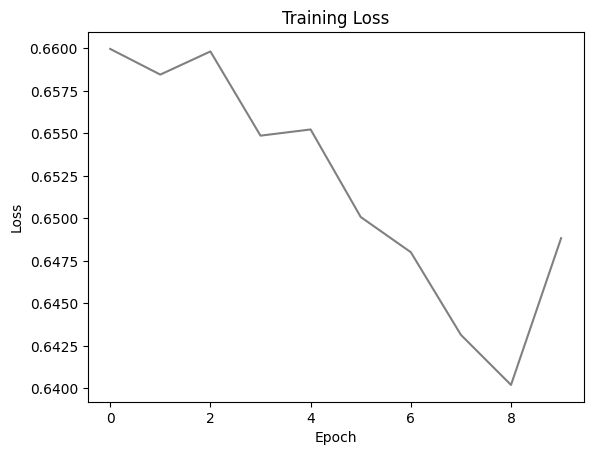

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 59
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=59, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [23]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


13697/13697 [==============================] - 44s 3ms/step
Accuracy: 0.6072
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.74      0.65    218054
           1       0.65      0.48      0.55    220250

    accuracy                           0.61    438304
   macro avg       0.62      0.61      0.60    438304
weighted avg       0.62      0.61      0.60    438304

Confusion Matrix:
 [[160688  57366]
 [114806 105444]]


In [24]:
df = pd.read_csv("../../labelled_data/part_B/partb_rus_type_features.csv")

In [25]:
df = df.drop(["Unnamed: 0"],axis=1)

(10, 59)
(10, 1, 59)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 59)                28084     
                                                                 
 dense_8 (Dense)             (None, 128)               7680      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35893 (140.21 KB)
Trainable params: 35893 (140.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: -0.1551 - accuracy: 0.1250 - val_loss: 0.0666 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 55ms/step - loss: -0.9414 - accuracy: 0.1250 - val_loss: -0.3597

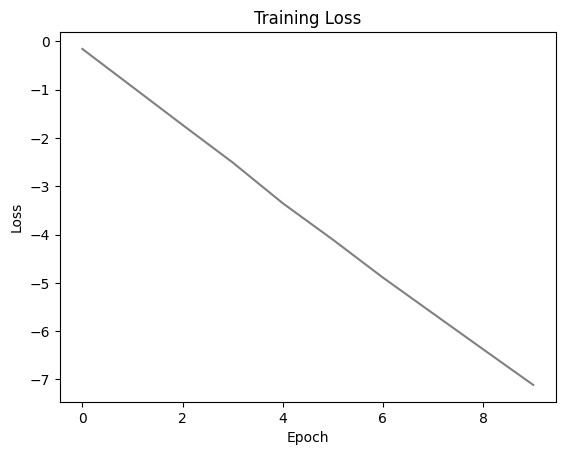

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['FraudType'], axis=1)
y = df['FraudType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 59
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=59, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [27]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


1/1 [==============================] - 0s 431ms/step
Accuracy: 0.0000
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

Confusion Matrix:
 [[0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]]


/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [2]:
df = pd.read_csv("../../labelled_data/part_B/partb_ros_type_features.csv")

In [3]:
df = df.drop(["Unnamed: 0"],axis=1)

(11446344, 59)
(11446344, 1, 59)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 59)                28084     
                                                                 
 dense (Dense)               (None, 128)               7680      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35893 (140.21 KB)
Trainable params: 35893 (140.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


71540/71540 [==============================] - 1136s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0765 - val_loss: 0.0000e+00 - val_accuracy: 0.0760
Epoch 2/10
71540/71540 [==============================] - 1132s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0761 - val_loss: 0.0000e+00 - val_accuracy: 0.0754
Epoch 3/10
71540/71540 [==============================] - 1128s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0762 - val_loss: 0.0000e+00 - val_accuracy: 0.0767
Epoch 4/10
71540/71540 [==============================] - 1130s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0747 - val_loss: 0.0000e+00 - val_accuracy: 0.0738
Epoch 5/10
71540/71540 [==============================] - 1133s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0743 - val_loss: 0.0000e+00 - val_accuracy: 0.0762
Epoch 6/10
71540/71540 [==============================] - 1126s 16ms/step - loss: 0.0000e+00 - accuracy: 0.0749 - val_loss: 0.0000e+00 - val_accuracy: 0.0739
Epoch 7/10
71540/71540 [==============================] - 1127s

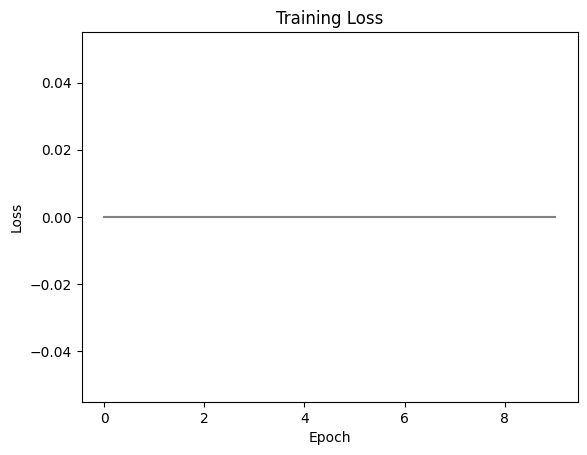

In [4]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['FraudType'], axis=1)
y = df['FraudType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 59
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=59, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [5]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


89425/89425 [==============================] - 283s 3ms/step
Accuracy: 0.0732


/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.02      0.04    220506
           1       0.07      0.93      0.13    219923
           2       0.00      0.00      0.00    220160
           3       0.00      0.00      0.00    219441
           4       0.00      0.00      0.00    219881
           5       0.00      0.00      0.00    220554
           6       0.00      0.00      0.00    220506
           7       0.00      0.00      0.00    219980
           8       0.00      0.00      0.00    219640
           9       0.00      0.00      0.00    220210
          10       0.00      0.00      0.00    220713
          11       0.00      0.00      0.00    220020
          12       0.00      0.00      0.00    220052

    accuracy                           0.07   2861586
   macro avg       0.02      0.07      0.01   2861586
weighted avg       0.02      0.07      0.01   2861586

Confusion Matrix:
 [[  4213 216293      0      0      0

: 